## **Çoklu Doğrusal Regresyon**
Temel amaç, bağımlı ve bağımsız değişkenler arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.
### **Doğrusal Regresyon Varsayımları**
Hatalarnormal dağılır. Hatalar birbirinden bağımsızdır ve aralarında otokorelasyon yoktur. Her bir gözlem için hata terimleri varyansları sabittir. Değişkenler ile hata terimi arasında ilişki yoktur. Bağımsız değişkenler arasında çoklu doğrusal ilişki problemi yoktur.
### **Regresyon Modellerinin Avantaj ve Dezavantajları**
iyi anlaşılırsa diğre tüm ML ve DL konuları çok rahat kavranır. Doğrusallık nedensellik yorumları yapılabilmesini sağlar, bu durum aksiyoner ve stratejik modelleme imkanı verir. Değişkenlerin etki düzeyleri ve anlamlılıkları değerlendirilebilir. Bağımlı değişkendeki değişkenliğin açıklanma başarısı ölçülebilir. Model anlamlılığı değerlendirilebilir. Varsayımları vardır. Aykırı gözlemlere duyarlıdır.

In [1]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
X = df.drop("sales",axis=1)
X[0:10]

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 

In [4]:
X = df.drop("sales",axis=1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [5]:
X_train.shape

(160, 3)

In [6]:
y_train.shape

(160,)

In [7]:
X_test.shape

(40, 3)

In [8]:
y_test.shape

(40,)

In [9]:
training = df.copy()

In [10]:
training.shape

(200, 4)

#### **Statsmodels**

In [11]:
import statsmodels.api as sm

In [12]:
lm = sm.OLS(y_train, X_train)

In [13]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Sat, 19 Aug 2023   Prob (F-statistic):                   1.28e-137
Time:                        12:16:33   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


#### **scikit-learn model**

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [17]:
model.intercept_

2.979067338122629

In [18]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

### **Tahmin**
Model denklemi:

Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

Örneğin 30 birim TV harcaması, 10 birim radio harcaması, 40 birimde gazete harcaması olduğunda satışalrın tahmini değeri ne olur?

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
yeni_veri = [[30],[10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [21]:
model.predict(yeni_veri)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.32334798])

In [22]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [23]:
rmse

1.644727765644337

In [24]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [25]:
rmse

1.7815996615334502

### **Model Tuning/Model Doğrulama**

In [26]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [27]:
X = df.drop('sales',axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20,random_state=42)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [28]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.644727765644337

In [29]:
model.score(X_train, y_train)

0.8957008271017818

In [30]:
cross_val_score(model, X, y, cv=10, scoring="r2").mean()

0.8853562237979616

In [31]:
np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, 
                         scoring="neg_mean_squared_error")).mean()

1.6513523730313335

In [32]:
np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, 
                         scoring="neg_mean_squared_error")).mean()

1.8462778823997095

### **PCR Model - Temel Bileşen Regresyonu**
Değişkenlere boyut indirgeme uygulandıktan sonra çıkan bileşenlere regresyon modeli kurulması fikrine dayanır.

In [33]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [34]:
hit.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [37]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [38]:
y = df["Salary"]

In [39]:
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")

In [40]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [41]:
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,test_size=0.25,
                                                    random_state=42)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [44]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [45]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [46]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[0:5]

array([38.18, 59.88, 70.88, 78.88, 84.18])

In [47]:
lm = LinearRegression()

In [48]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [49]:
pcr_model.intercept_

543.4834416243655

In [50]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

### **Tahmin**

In [51]:
y_pred = pcr_model.predict(X_reduced_train)

In [52]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [53]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [54]:
df["Salary"].mean()

535.9258821292775

In [55]:
r2_score(y_train, y_pred)

0.5770075250410178

In [56]:
pca2 = PCA()

In [57]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [58]:
y_pred = pcr_model.predict(X_reduced_test)

In [59]:
np.sqrt(mean_squared_error(y_test, y_pred))

405.15753641499646

### **Model Tuning**

In [60]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:2], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:2])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

396.38761247967653


In [61]:
from sklearn import model_selection

In [62]:
cv_10 = model_selection.KFold(n_splits=10,shuffle=True,random_state=1)

In [63]:
lm = LinearRegression()

In [64]:
RMSE = []

In [65]:
for i in np.arange(1,X_reduced_train.shape[1]+1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                       X_reduced_train[:,:i],
                                                       y_train.ravel(),
                                                       cv=cv_10,
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

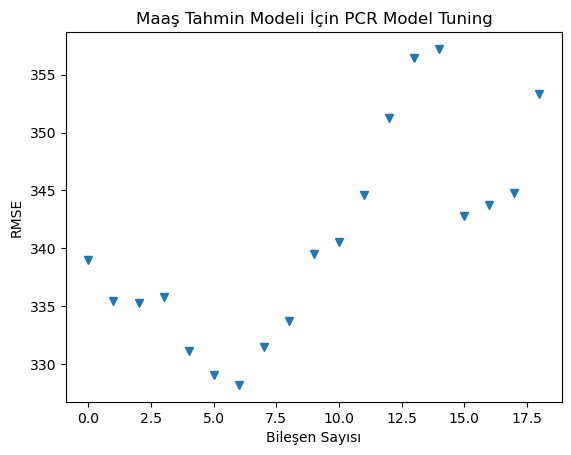

In [66]:
import matplotlib.pyplot as plt
plt.plot(RMSE, 'v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [67]:
lm = LinearRegression()

In [68]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [69]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [70]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.82659830945016


In [71]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [72]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.1198700096223


### **PLS Model - Kısmi En Küçük Kareler Regresyonu**
- Değişkenlerin daha az sayıda ve aralarında çoklu doğ. bağlantı problemi olmayan bileşenlere indirgenip regresyon modeli kurulması fikrine dayanır.
- Çok boyutluluk laneti p>n. 
- Çoklu doğrusal bağlantı problemi. 
- PLS de PCR gibi bağımsız değişkenlerin doğrusal kombinasyonlarını bulur. Bu doğrusal kombinasyonlar bileşen ya da latent değişken olarak adlandırılır. 
- PLS NIPALS'in özel bir halidir, iteratif olarak bağımlı değişken ile yüksek korelasyona sahip değişkenler arasında gizil(latent) ilişkiyi bulmaya çalışır. 
- PCR'da doğrusal kombinasyonlar yani bileşenler bağımsız değişken uzağındaki değişkenliği maksimum şekilde özetleyecek şekilde oluşturulur..
- Bu durum bağımlı değişkeni açıklama yeteneği olmamasına sebep olmakta. 
- PLS'te ise bileşenler bağımlı değişken ile olan kovaryansı maksimum şekilde özetleyecek şekilde oluşturulur. 
- Değişkenler atılmak istenmiyorsa ve açıklanabilirlik aranıyorsa: PLS 
- PLS, gözetimli boyut indirgeme prosedürü, PCR gözetimsiz boyut indirgeme prosedürü olarak görülebilir. 
- İki yönteminde bir tunning parametresi vardır o da bileşen sayısıdır. 
- Optimum bileşen sayısını belirlemek için CV yöntemi kullanır.

In [75]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [80]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)

In [81]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

### **Tahmin**

In [83]:
pls_model.predict(X_train)[0:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [84]:
y_pred = pls_model.predict(X_train)

In [85]:
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696

In [86]:
r2_score(y_train, y_pred)

0.5140424486535482

In [89]:
y_pred = pls_model.predict(X_test)

In [90]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

### **Model Tuning**

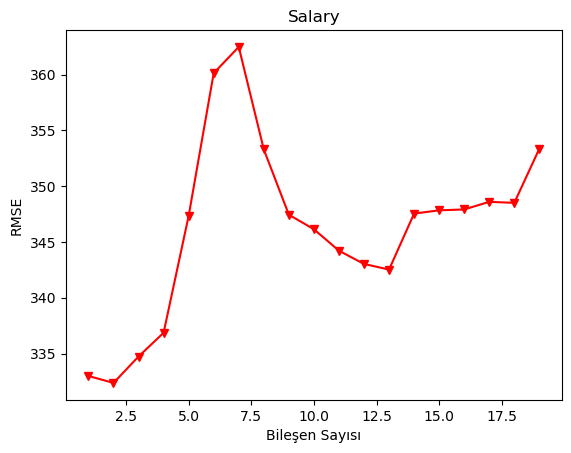

In [91]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1]+1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)
    
#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1,X_train.shape[1]+1), np.array(RMSE), '-v', c="r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [92]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)

In [93]:
y_pred = pls_model.predict(X_test)

In [94]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

### **Ridge Regression**
Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.
- Aşırı öğrenmeye karşı dirençli.
- Yanlıdır fakat varyansı düşüktür.(Bazen yanlı modelleri daha çok tercih ederiz.)
- Çok fazla parametre olduğunda EKK'ya göre daha iyidir.
- Çok boyutluluk lanetine karşı çözüm sunar.
- Çoklu doğrusal bağlantı problemi olduğunda etkilidir.
- Tüm değişkenler ile model kurar. İlgisiz değişkenleri modelden çıkarmaz, katsayılarını sıfıra yaklaştırır.
- lambda kritik roldedir. İki terimin(formüldeki) göreceli etkilerini kontrol etmeyi sağlar.
- lambda için iyi bir değer bulunması önemlidir. Bunun için CV yöntemi kullanılır.

### **Model**

In [97]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25,
                                                  random_state=42)

In [98]:
from sklearn.linear_model import Ridge

In [99]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [100]:
ridge_model

Ridge(alpha=0.1)

In [101]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

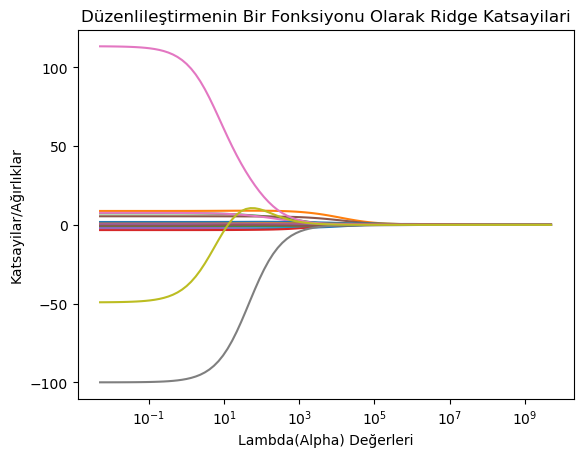

In [103]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale('log')

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayilar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayilari');

### **Tahmin**

In [104]:
y_pred = ridge_model.predict(X_test)

In [105]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.0517922282843

### **Model Tuning**

In [106]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [107]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [109]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize=True)

In [110]:
ridge_cv.fit(X_train,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [111]:
ridge_cv.alpha_

0.7599555414764666

In [112]:
ridge_tuned = Ridge(alpha=ridge_cv.alpha_, 
                    normalize=True).fit(X_train,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [113]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

386.68264297564144

## **Lasso Regresyon**
Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.
- Ridge regresyonun ilgili-ilgisiz tüm değişkenleri modelde bırakma dezavantajını gidermek için önerilmiştir.
- Lasso'da katsayıları sıfıra yaklaştırır.
- Fakat L1 normu lambda yeteri kadar büyük olduğunda bazı katsayıları sıfır yapar. Böylece değişken seçimi yapmış olur.
- lambda'nın doğru seçilmesi çok önemlidir, burada da CV kullanılır.
- Ridge ve Lasso yöntemleri birbirinden üstün değildir.
- **Ayar Parametresinin Belirlenmesi**
- lambda'nın sıfır olduğu yer EKK'dır. HKT'yi minimum yapan lambda'yı arıyoruz.
- lambda için belirli değerleri içeren bir küme seçilir ve her birisi için cross validation test hatası hesaplanır.
- En küük cross validation'ı veren lambda ayar parametresi olarak seçilir.
- Son olarak seçilen bu lambda ile model yeniden tüm gözlemlere fit edilir.

### **Model**

In [114]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25,
                                                  random_state=42)

In [115]:
from sklearn.linear_model import Lasso

In [116]:
lasso_model = Lasso(alpha=0.1).fit(X_train, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.249e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [117]:
lasso_model

Lasso(alpha=0.1)

In [118]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.002e+03, tolerance: 

Text(0, 0.5, 'weights')

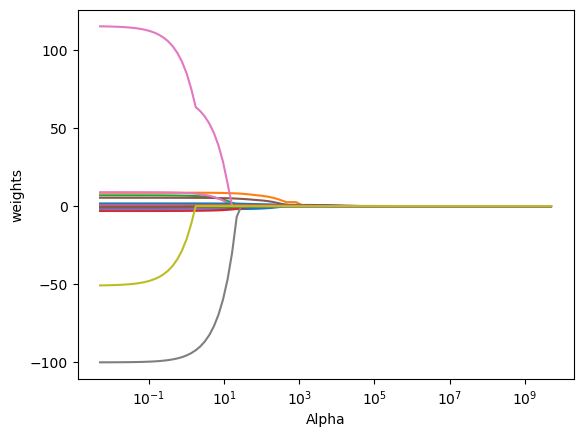

In [119]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Alpha')
plt.ylabel('weights')

### **Tahmin**

In [120]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [121]:
y_pred = lasso_model.predict(X_test)

In [122]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.754527014877

### **Model Tuning**

In [123]:
from sklearn.linear_model import LassoCV

In [124]:
lasso_cv_model = LassoCV(alphas = None,
                         cv = 10,
                         max_iter = 10000,
                         normalize = True)

In [125]:
lasso_cv_model.fit(X_train, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=10000, normalize=True)

In [126]:
lasso_cv_model.alpha_

0.39406126432470073

In [127]:
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_)

In [128]:
lasso_tuned.fit(X_train, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.253e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.39406126432470073)

In [129]:
y_pred = lasso_tuned.predict(X_test)

In [130]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.52263769583675

## **ElasticNet Regresyonu**
Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceva uygulayarak bulmaktır. ElasticNet L1 ve L2 yaklaşımlarını birleştirir.

In [131]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [132]:
from sklearn.linear_model import ElasticNet

In [134]:
enet_model = ElasticNet().fit(X_train, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [135]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [136]:
enet_model.intercept_

-6.465955602111762

### **Tahmin**

In [137]:
enet_model

ElasticNet()

In [138]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [139]:
y_pred = enet_model.predict(X_test)

In [140]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.16765481812445

In [141]:
r2_score(y_test, y_pred)

0.4107022246932692

### **Model Tuning**

In [142]:
from sklearn.linear_model import ElasticNetCV

In [143]:
enet_cv_model = ElasticNetCV(cv=10, random_state=0).fit(X_train,y_train)

In [144]:
enet_cv_model.alpha_

5230.7647364798695

In [145]:
enet_tuned = ElasticNet(alpha=enet_cv_model.alpha_).fit(X_train,y_train)

In [146]:
y_pred = enet_tuned.predict(X_test)

In [147]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795